In [2]:
# Generate all the spectra for set ranges within parameter space

In [6]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import *
import itertools
import astropy.units as u
import astropy.constants as const
import time

In [4]:
grid_ranges = {}
grid_ranges['logzsol'] = np.linspace(-1,.5,10)
grid_ranges['dust2'] = np.linspace(0,3,10)
grid_ranges['tage'] = np.linspace(7,9,10)

run_params = {}
run_params['zred'] = 3.548
run_params['mass'] = 1e8
run_params['add_duste'] = False
run_params['zcontinuous'] = 1

In [3]:
obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs,sps=sps,**run_params)

In [4]:
data_grid_params = np.empty((len(grid_ranges['logzsol']),len(grid_ranges['dust2']),len(grid_ranges['tage']),5))
data_grid_spec = np.empty((len(grid_ranges['logzsol']),len(grid_ranges['dust2']),len(grid_ranges['tage']),len(wspec)))
data_grid_phot = np.empty((len(grid_ranges['logzsol']),len(grid_ranges['dust2']),len(grid_ranges['tage']),len(wphot)))

NameError: name 'np' is not defined

In [5]:
start = time.time()

for i_logz,i_dust,i_tage in itertools.product(range(len(grid_ranges['logzsol'])),range(len(grid_ranges['dust2'])),range(len(grid_ranges['tage']))):
    
    logz = grid_ranges['logzsol'][i_logz]
    dust = grid_ranges['dust2'][i_dust]
    tage = grid_ranges['tage'][i_tage]

    run_params['tage'] = tage
    run_params['dust2'] = dust
    run_params['logzsol'] = logz

    model = getModel(**run_params)
    
    init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)

    flux_density_phot = []
    for wave,mag in zip(wphot,init_phot):
        jy = mag*3631.0 * u.Jy
        flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*u.AA))
        flux_density_phot.append(flux.value*10**20)

    flux_density_spec = []
    for wave,mag in zip(wspec,init_spec):
        jy = mag*3631.0 * u.Jy
        flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*u.AA))
        flux_density_spec.append(flux.value*10**20)

    data_grid_params[i_logz, i_dust, i_tage, :] = [run_params['zred'], run_params['mass'], logz, dust, tage]
    data_grid_spec[i_logz, i_dust, i_tage, :] = flux_density_spec
    data_grid_phot[i_logz, i_dust, i_tage, :] = flux_density_phot

end = time.time()

In [6]:
np.save('params', data_grid_params)
np.save('specs', data_grid_spec)
np.save('phots', data_grid_phot)

# loaded_array = np.load('test_file.npy')

In [15]:
data_grid_params[:,:,:,0][data_grid_params[:,:,:,0] == 3.548].shape

mask = data_grid_params[:,:,:,0] == 3.548

print(pp-start)

1155.2918689250946


In [ ]:
figure(figsize=(16,8))

i_logz, i_dust, i_tage = 0,0,0 # Opportunity to make a for loop

loglog(wspec, data_grid_spec[i_logz,i_dust,i_tage,:], label=', '.join(["{}={}".format(p,data_grid_params[i_logz,i_dust,i_tage,:][i]) for i,p in zip(range(5),model.free_params)]))
plot(wphot, data_grid_phot[i_logz,i_dust,i_tage,:], color='black', alpha=0.6, marker='o', ls='')

plotBalmerBreak(**run_params)

a = 1.0 + run_params['zred']

# print(data_grid_phot[i_logz,i_dust,i_tage,:].max())
ymin, ymax = data_grid_phot[i_logz,i_dust,i_tage,:].min()/2, data_grid_phot[i_logz,i_dust,i_tage,:].max()*2

xlim([1900*a,40500*a])
ylim([ymin,ymax])
# ylim([1e-4,5e2])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

legend()

show()

In [ ]:
data_grid_params[0,0,1,:]

In [13]:
mask = data_grid_params[:,:,:,0] == 3.548

temporary_params = data_grid_params[mask]
temporary_spec = data_grid_spec[mask]
temporary_phot = data_grid_phot[mask]

In [20]:
temporary_spec[0]

array([1.08500667e+02, 1.12514426e+02, 1.24775376e+02, ...,
       1.59448216e-11, 1.53660365e-11, 1.48078003e-11], shape=(5994,))

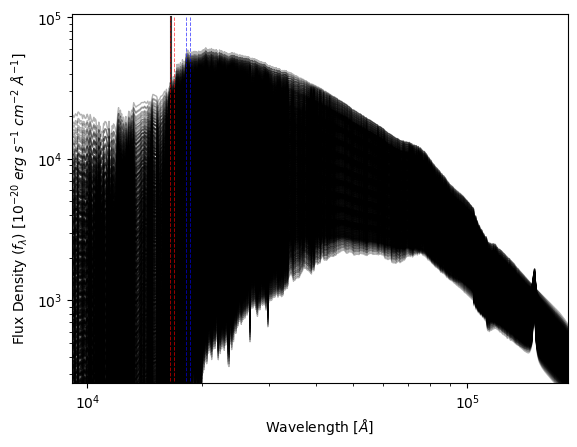

In [28]:
for item in temporary_spec[:]:
    loglog(wspec,item, lw=1, color='black', alpha=.3)

plotBalmerBreak(**run_params)

a = 1.0 + run_params['zred']
ymin, ymax = data_grid_phot[0,0,0,:].min()/2, data_grid_phot[0,0,0,:].max()*2

xlim([2000*a,40500*a])

# xlim([3300*a,4500*a])
ylim([ymin,ymax])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

show()

In [41]:
ymin, ymax = data_grid_phot[0,0,0,:].min()/2, data_grid_phot[0,0,0,:].max()*2
ymin, ymax

(np.float64(259.7270045780053), np.float64(106617.17051956867))

In [33]:
data_grid_phot[i_logz,i_dust,i_tage,:].max()

np.float64(3.760491035288661e+179)

In [38]:
data_grid_params[i_logz-1, i_dust-1, i_tage-1,:]

array([ 3.54800000e+00,  1.00000000e+08, -8.33333333e-01,  0.00000000e+00,
        8.55555556e+00])

In [39]:
i_logz, i_dust, i_tage

(2, 1, 8)

In [72]:
wspec[111:113], wspec[110:114]

(array([3661.14, 3706.62]), array([3615.66, 3661.14, 3706.62, 3752.1 ]))

In [29]:
a = 1.0 + run_params['zred']

n = 0
for i,s in enumerate(wspec>4100*a):
    if s:
        print(s, n, wspec[i])
        break
    n+=1

True 915 18649.3327812


In [127]:
balms = np.zeros(1000)
weird = np.zeros(1000, dtype=bool)
reg = np.zeros(1000, dtype=bool)

for i,item in enumerate(temporary_spec):
    break_strength = item[111:113].mean() - item[119:121].mean()
    balms[i] = (break_strength)
    if break_strength < 0:
        weird[i] = True
    else:
        reg[i] = True

balms[reg]

array([2068.33757202, 1715.14045916, 1422.45731292, 1179.87458002,
        978.75193297,  811.95466448,  673.79260347,  559.59049348,
        465.4009306 ,  387.89704374,  187.85523249,  156.44710067,
        130.39669221,  108.7727028 ,   90.80492   ,   75.8608449 ,
         63.44881275,   53.16805711,   44.67702702,   37.68539518,
       2077.92390734, 1721.5843691 , 1426.61409325, 1182.54300082,
        980.65813873,  813.7255669 ,  675.81482002,  562.01525532,
        468.2246155 ,  391.01939981,  205.06218992,  170.42550133,
        141.7520452 ,  118.01858283,   98.37506184,   82.11743958,
         68.67322036,   57.56971629,   48.41126662,   40.86703992,
       1979.76647393, 1640.09903627, 1359.0147208 , 1126.57464704,
        934.49302869,  775.8687029 ,  644.9598047 ,  536.99190324,
        447.99763366,  374.68277531,  191.31360819,  159.00692145,
        132.27386071,  110.16580588,   91.89263491,   76.79697014,
         64.33299522,   54.04732821])

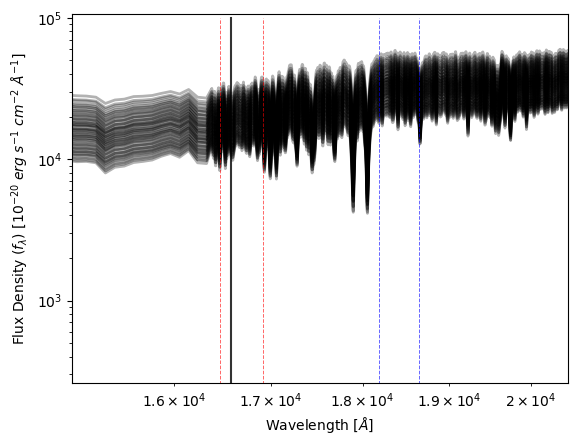

In [105]:
# temporary_spec[reg]

for item in temporary_spec[reg]:
    loglog(wspec,item, lw=2, color='black', alpha=0.3)

plotBalmerBreak(**run_params)

a = 1.0 + run_params['zred']
ymin, ymax = data_grid_phot[0,0,0,:].min()/2, data_grid_phot[0,0,0,:].max()*2

xlim([3300*a,4500*a])
ylim([ymin,ymax])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

show()

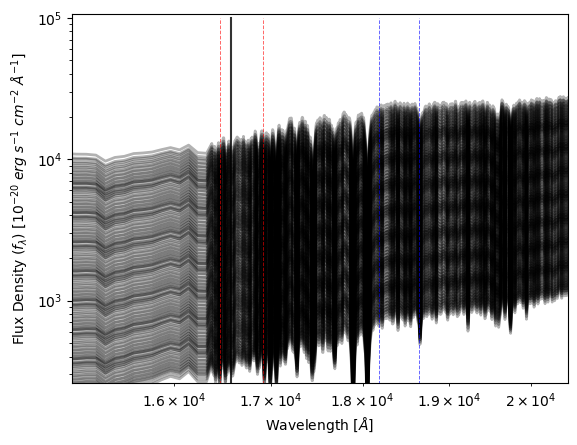

In [106]:
for item in temporary_spec[werid]:
    loglog(wspec,item, lw=2, color='black', alpha=0.3)

plotBalmerBreak(**run_params)

a = 1.0 + run_params['zred']
ymin, ymax = data_grid_phot[0,0,0,:].min()/2, data_grid_phot[0,0,0,:].max()*2

xlim([3300*a,4500*a])
ylim([ymin,ymax])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

show()

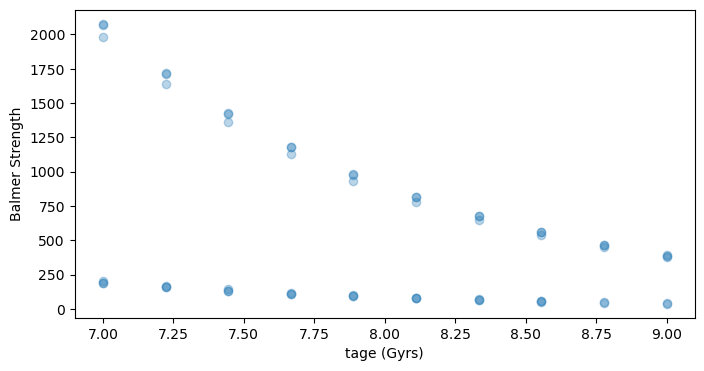

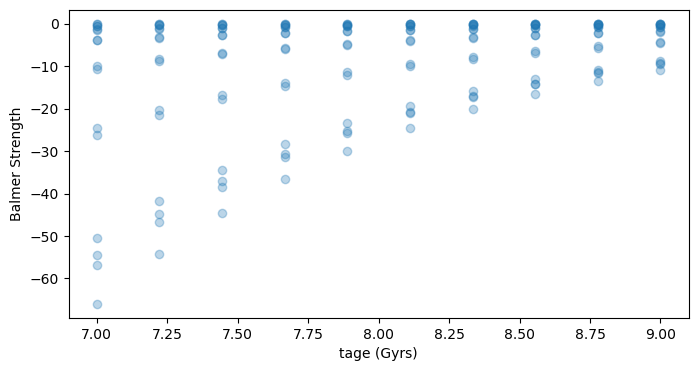

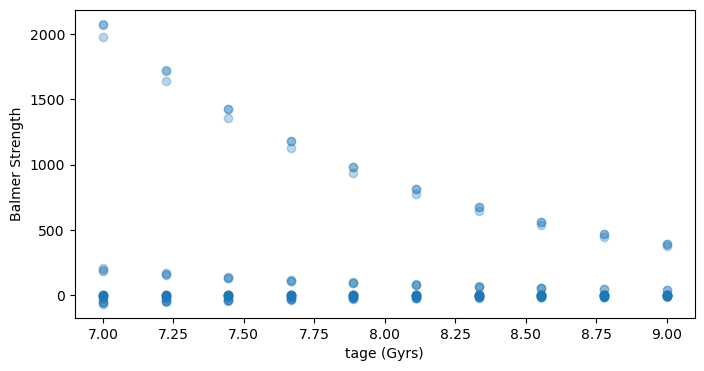

In [129]:
figure(figsize=(8,4))
plot(temporary_params[:,4][reg],balms[reg], 'o', alpha=0.3)
xlabel('tage (Gyrs)')
ylabel('Balmer Strength')
show()

figure(figsize=(8,4))
plot(temporary_params[:,4][weird],balms[weird], 'o', alpha=0.3)
xlabel('tage (Gyrs)')
ylabel('Balmer Strength')
show()

figure(figsize=(8,4))
plot(temporary_params[:,4],balms, 'o', alpha=0.3)
xlabel('tage (Gyrs)')
ylabel('Balmer Strength')
show()

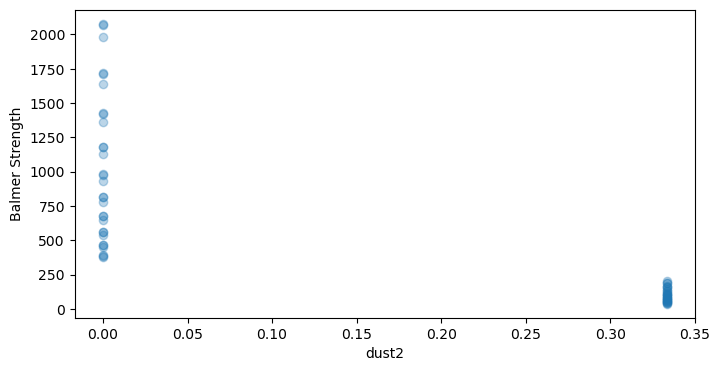

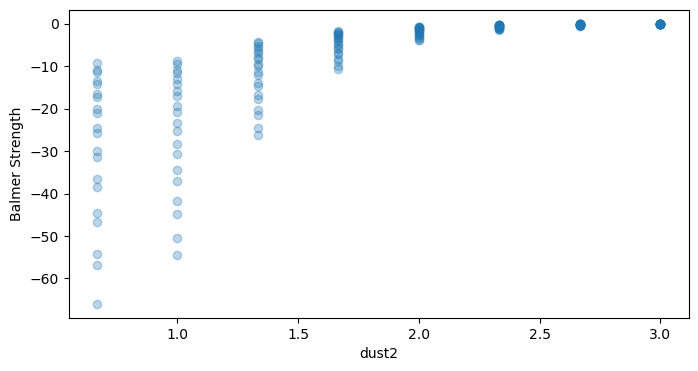

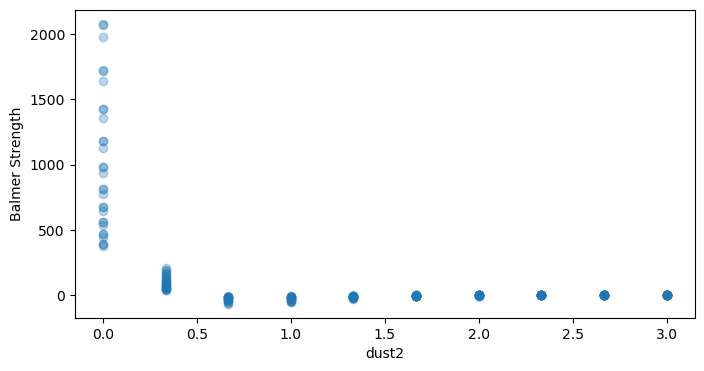

In [130]:
figure(figsize=(8,4))
plot(temporary_params[:,3][reg],balms[reg], 'o', alpha=0.3)
xlabel('dust2')
ylabel('Balmer Strength')
show()

figure(figsize=(8,4))
plot(temporary_params[:,3][weird],balms[weird], 'o', alpha=0.3)
xlabel('dust2')
ylabel('Balmer Strength')
show()

figure(figsize=(8,4))
plot(temporary_params[:,3],balms, 'o', alpha=0.3)
xlabel('dust2')
ylabel('Balmer Strength')
show()

# [run_params['zred'], run_params['mass'], logz, dust, tage

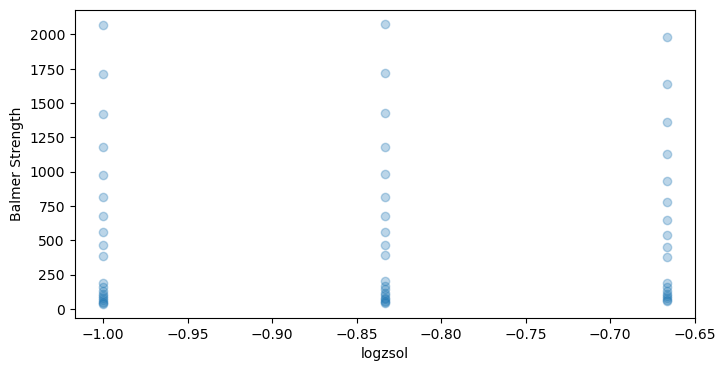

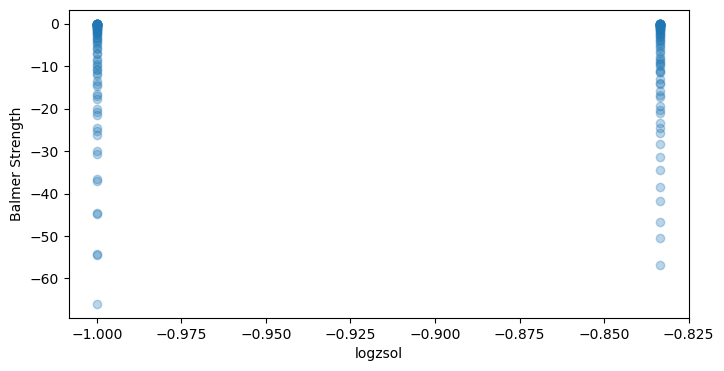

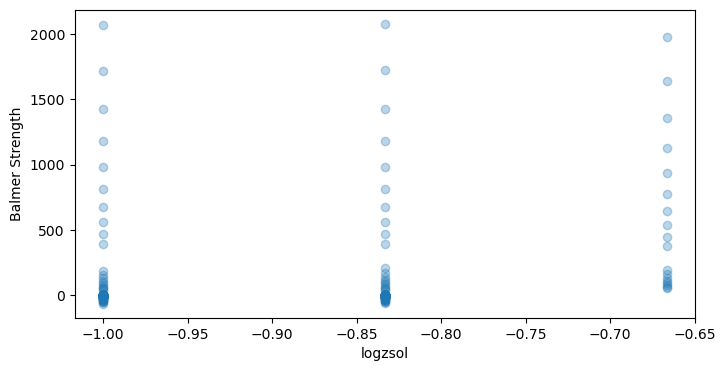

In [133]:
figure(figsize=(8,4))
plot(temporary_params[:,2][reg],balms[reg], 'o', alpha=0.3)
xlabel('logzsol')
ylabel('Balmer Strength')
show()

figure(figsize=(8,4))
plot(temporary_params[:,2][weird],balms[weird], 'o', alpha=0.3)
xlabel('logzsol')
ylabel('Balmer Strength')
show()

figure(figsize=(8,4))
plot(temporary_params[:,2],balms, 'o', alpha=0.3)
xlabel('logzsol')
ylabel('Balmer Strength')
show()

In [135]:
def getBalmerStrength(spec):

    return spec[111:113].mean() - spec[119:121].mean()
    

In [137]:
getBalmerStrength(temporary_spec[0])

np.float64(2068.3375720222575)

In [148]:
your_array = np.zeros((2,2,3,10))
your_array2 = np.ones((1,2,3,4))

np.save('test_file', your_array2)

# loaded_array = np.load('test_file.npy')

In [149]:
loaded_array = np.load

In [150]:
loaded_array

array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]])

In [11]:
data_grid_params[0,0,0,:], data_grid_params[-2,-2,-2,:]

(array([ 3.548e+00,  1.000e+08, -1.000e+00,  0.000e+00,  7.000e+00]),
 array([3.54800000e+00, 1.00000000e+08, 3.33333333e-01, 2.66666667e+00,
        8.77777778e+00]))

In [8]:
data_grid_params = np.load('params.npy')


In [11]:
data_grid_params.shape

(10, 10, 10, 5)

In [12]:
data_grid_params.ravel().shape

(5000,)

In [15]:
dgpi = np.indices(data_grid_params.shape)
dgpi.shape

(4, 10, 10, 10, 5)